

##**Name - Affan**
##**Roll No. - 242210001**
##**Date - 11/02/2025**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


##Data Exploration and Preprocessing:

1. Analyze the distribution of each feature.

In [ ]:

data = pd.read_csv("/content/diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Handle missing values (if any) appropriately.

In [ ]:
print (data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Perform feature scaling.

In [ ]:
scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##• Model Implementation:
1. Implement the K-Nearest Neighbors (KNN) classifier using Scikit-learn.
2. Experiment with different values of K (number of neighbours) and find the
optimal value.
3. Use Euclidean distance as the similarity measure.

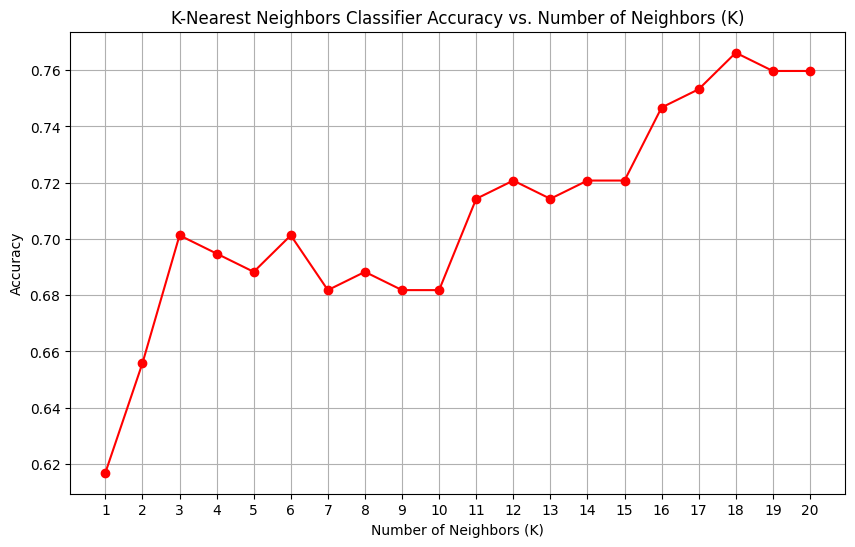

The optimal value of K is: 18
Final model accuracy with K=18: 0.7662337662337663


In [ ]:
# 1. Implementing the K-Nearest Neighbors (KNN) classifier using Scikit-learn.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
accuracies = []
precisions = []
recalls = []
confusion_matrices = []

# 2. Experimenting with different values of K (number of neighbours) and find the optimal value.

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r')
plt.title('K-Nearest Neighbors Classifier Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


optimal_k = k_values[np.argmax(accuracies)]
print(f"The optimal value of K is: {optimal_k}")

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

final_predictions = knn_optimal.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final model accuracy with K={optimal_k}: {final_accuracy}")

##• Performance Evaluation:

1. Evaluate the model using accuracy, precision, and recall metrics.
2. Plot a confusion matrix to evaluate classification performance.
3. Compare model performance for different values of K.

In [ ]:
final_accuracy = accuracy_score(y_test, y_pred_optimal)
final_precision = precision_score(y_test, y_pred_optimal)
final_recall = recall_score(y_test, y_pred_optimal)

print(f"Final model evaluation with K={optimal_k}:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")

Final model evaluation with K=18:
Accuracy: 0.7662
Precision: 0.7436
Recall: 0.5273


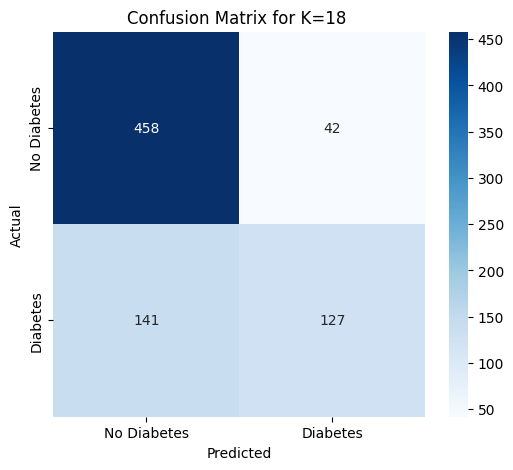

In [ ]:
y_pred_full = knn_optimal.predict(X_scaled)
conf_matrix_full = confusion_matrix(y, y_pred_full)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for K={optimal_k} ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Observational Questions:
**Q1.** Identify any two limitations of KNN for this dataset.

Ans. Sensitive to the Curse of Dimensionality: KNN calculates distances between data points, and as the number of features increases, the distance between points also increases, making it harder to distinguish between similar and dissimilar data points. In high-dimensional data, this can reduce the algorithm's effectiveness, as it relies heavily on distance calculations to classify data.

Computationally Expensive: KNN is a lazy learner, meaning it doesn't build a model during training. Instead, it stores the entire dataset and calculates the distance to every point during prediction. This can be computationally expensive and time-consuming, especially when working with larger datasets or a high value of K, as the model doesn't scale well with data size.



**Q2.** What happens when K is too small or too large?

Ans. When K is Too Small: A very small K value causes the model to be overly sensitive to individual data points, resulting in overfitting.For example With K=1, the model classifies based on the closest data point, which can lead to making decisions that are influenced by noise and outliers. This means the model fits too closely to the training data and may perform poorly on unseen data (test set), because it cannot generalize well.

When K is Too Large: A very large K value causes the model to consider too many neighbors, which can lead to underfitting. The model becomes too simplistic, relying on the majority class and losing the ability to capture important patterns in the data. It generalizes too much and doesn't account for subtler trends, leading to lower accuracy on both the training and test sets.

K-Nearest Neighbors (KNN) Classifier

What is KNN Classifier?

The K-Nearest Neighbors (KNN) Classifier is a simple, intuitive, and powerful supervised machine learning algorithm used for classification (and sometimes regression) tasks.
It predicts the class of a new data point based on the majority class of its K nearest neighbors in the feature space.

How Does KNN Work?

Choose K:
Decide the number of neighbors (K) to consider.

Calculate Distance:
Measure the distance between the new data point and all the points in the training set.
Common distance metrics include:

Euclidean Distance (most common)

Manhattan Distance

Minkowski Distance

Find Nearest Neighbors:
Identify the K data points that are closest to the new point.

Vote for the Class:
Among the K nearest neighbors, the class that occurs most frequently is assigned to the new data point.

Example:
Suppose you want to classify whether a fruit is an apple or an orange based on weight and color.

You choose K = 3.

Find the 3 nearest fruits to your unknown fruit based on their weight and color.

If 2 out of 3 nearest fruits are apples, classify the new fruit as an apple.

Important Parameters:
K (Number of Neighbors):
Choosing a small K (e.g., K=1) can be noisy and sensitive to outliers, while a large K can make the prediction slower and less sensitive to subtle patterns.

Distance Metric:
The way "closeness" is calculated significantly impacts the model’s performance.

Advantages of KNN:
Simple to understand and easy to implement.

No training phase (it's an instance-based learning method).

Naturally handles multi-class classification problems.

Works well with small datasets.

Disadvantages:
Computationally expensive during prediction (needs to calculate distance for every training point).

Sensitive to irrelevant or redundant features.

Performance can degrade with high-dimensional data (curse of dimensionality).

Common Use Cases:
Recommendation systems

Handwriting recognition

Image classification

Anomaly detection